In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
import xgboost

from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


# Uploading the data

In [4]:
df0 = pd.read_csv(r'C:\Users\Dikla\Desktop\fashion-mnist_train.csv')

In [5]:
df0

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# uploding test Data for later on

In [6]:
df_test = pd.read_csv(r'C:\Users\Dikla\Desktop\fashion-mnist_test.csv')

In [7]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## plot one image of the data to see how it looks for example

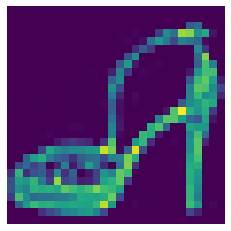

In [15]:
image1 = X0[30]
image1 = image1.reshape(28,28)
plt.axis("off")
plt.imshow(image1)

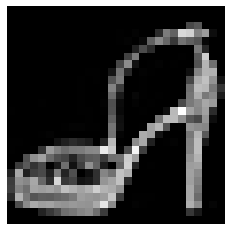

In [16]:
plt.axis("off")
plt.imshow(image1, cmap=plt.get_cmap('gray'))

# check for duplicates

In [11]:
df1 = df0.drop_duplicates()
df1

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# check for NaN
#### All data is pixels so we dont expect for NaN but we'll check anyway

In [12]:
df0.isna().sum().sum()

0

## preprocessing of final test

#### Drop label for the final test in the end

In [13]:
X1 = df_test.drop(['label'],axis = 1)
y1 = df_test.label

In [14]:
X0 = df0.drop(['label'],axis = 1).values

# preprocessing
#### Making the data ready for models

In [17]:
X = df1.drop(['label'],axis = 1)
y = df1.label

# split the Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32849,0,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
5226,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
51886,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
52903,0,0,0,1,0,0,0,0,0,39,...,0,3,0,0,175,200,208,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53310,0,0,0,0,0,0,0,0,0,0,...,103,56,0,4,0,0,0,0,0,0
5347,0,0,0,0,0,0,0,0,0,0,...,41,33,34,12,0,1,0,0,0,0
51254,0,0,0,0,0,0,0,10,10,14,...,25,0,9,8,0,0,0,0,0,0
870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,130,130,39,0,0,0


In [20]:
y.shape, y_train.shape, y_test.shape

((59957,), (47965,), (11992,))

# Scaling
### We need to normalized the data to be all values between 0-1 (normal distribution) so the model will not be "confused" by bigger numbers that have no significent effect on the labels.

In [21]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))
X_test_final = pd.DataFrame(scaler.transform(X1.values))

# Models

### We will not do Dummy Classifier this time, the dummy should giva us about 10% accuracy because we have 10 different classes which mean 10 different clothing featuers that are mostly balanced. Usually we'll use Dummy classifier for comperation to our models , but all models have higher accuracy than 50% .

# PCA
### PCA- principal component analysis, is an algorithm that can explain wich precent of the data we can explain with the minimal amount of dimentions. PCA is a dimensionality reduction technique, which is in fact linear transformations applied on (usually) highly correlated multidimensional data. The input dimensions are transformed in a new coordinate system in which the produced dimensions contain, in decreasing order, the greatest variance related with unchanged landscape features.

In [22]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) 
print (d)

254


### here we can see that out of 800 dimentions, we can use only 254 for 95% of the data. which means we can wxplain 95% of the variance with 254 dimentions.

Text(0, 0.5, 'Explained Variance')

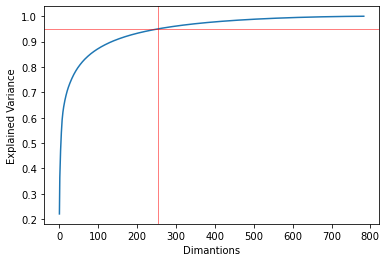

In [23]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');
plt.xlabel("Dimantions")
plt.ylabel("Explained Variance")

# PCA implementaion

In [24]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))
X_test_reduced_final = pd.DataFrame(pca.transform(X_test_final))

# Before PCA
### For best learning, lets do all models before PCA and all again after PCA . Then we can learn about it which one is better. usually, PCA will drop the accuracy slightly because we lower the dimentions so we can still explain 95% of the data. However, we take into consideraition that usually we'll get maximum 95% of the data, so it makes sence will loose a little bit of the accuracy while working.

# KNN
### KNN is a model who works by nearset neighbors.The model 'looks' at the nearest neighbors calssification which will be the best parameter to decide which type-dog or cat is the most accurate for this new given picture. We can decied how many neighbors to check by the parameter = K which represents the scope of the search. also we can do some testing to see which K will gives us the best results. 

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred)
print(knn_accuracy)

### KNN gave us before PCA 85% accuracy

# Random Forest
### Random Forest model base on decision trees. this model has the ability to know which feature contains the most significant information. it "runs" on all features and tests which feature manages to divide the data to the most accurate division percentages. Random Forest model builds many decision trees for all features, and any new picture we need to calssify, will be applied on all these trees until it makes a decision which lable it is.

In [26]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
RF_accuracy = accuracy_score(y_test,pred)
print(RF_accuracy)

### Random Forest gave us before PCA 58% accuracy

# Voting
### voting model divided into hard voting and soft voting. as its name- this model makes a voting among all the models we have preformed and takes the highest score of them. the soft voting refer to the probabillity while the hard voting performs a simple vote between the models and takes the highest.

In [28]:
gnb = GaussianNB()
lr = LogisticRegression()

In [29]:
voting = VotingClassifier(estimators = [('knn',knn),("RF",clf),('gaussian-bayes',gnb)])

In [ ]:
voting.fit(X_train,y_train)
pred = voting.predict(X_test)
voting_acuracy = accuracy_score(y_test,y_pred)
print(voting_acuracy)

### Voting gave us before PCA 70% accuracy

# Bagging and Pasting
### Bagging and pasting - bootstrap aggregating , is a an algorithm which uses the same traning algorithm for evety predictor, but to train them on different random subsets of traning set. when sampling is performed with replacement, this method is called bagging. when sampling is performed without replacment it is called pasting.

#### The Bagging classifier aoutomatically performs soft voting instead of hard voting if the base classifier cam estimate class probabilities.
##### we'll try  Bagging first, and then we'll try again with pastin and see the results

In [31]:
#from sklearn.ensemble import BaggingClassifier
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train , y_train)
y_pred = bag_clf.predict(X_test)
bagging_acuracy = accuracy_score(y_test,y_pred)
print(bagging_acuracy )

In [ ]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train , y_train)
y_pred = bag_clf1.predict(X_test)
pasting_acuracy = accuracy_score(y_test,y_pred)
print(pasting_acuracy )

### Bagging and Pasting gave us before PCA arount of 76% accuracy

# XGBoost
### To explain what XGBboost is we need first to understand what GradientBoost is. GradientBoosting soupports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. This trades a higher bias for a lower variance. it also speeds up traning considerably. after understanding what GradientBoost means, we can explaine what XGBoost means. XGBoost -Extreame Gradient Boosting is an optimized implementation of Gradient Boosting. it aims at being extreamly fast, scalable and portable. 

In [34]:
xgb_clf = xgboost.XGBClassifier(n_estimators = 1500,learning_rate = 0.05,use_label_encoder = False, eval_metric = "merror")

In [ ]:
xgb_clf.fit(X_train,y_train)
pred = xgb_clf.predict(X_test)
xgb_acuracy = accuracy_score(y_test,y_pred)
print(xgb_acuracy )

### XGBoost is the best model so far which gave us 90 % accuracy before PCA.


# AdaBoost
### AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_test)
ada_acuracy = accuracy_score(y_test,y_pred)
print(ada_acuracy)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN']
accuracy = [0.58,0.58,0.56,0.56,0.58,0.59,0.56]
ax.bar(langs,accuracy)
height = [0.58,0.58,0.56,0.56,0.58,0.59,0.56]
bars = ('XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['orange', 'pink', 'green', 'red', 'blue', 'yellow', 'purple'])

plt.show()

In [ ]:
total_models = pd.DataFrame (np.array([['xgboost' ,xgb_acuracy], ['AdaBoost',ada_acuracy], ['RF' ,RF_accuracy],['voting' ,voting_acuracy], ['pasting',pasting_acuracy], ['bagging' ,bagging_acuracy], ['KNN' ,knn_accuracy]]),
                   columns=['Model', 'Accuracy'])
total_models

### We can see in this case, AdaBoost has the worst results for us with only 46% accuracy before PCA

# After PCA
### Now let's see the accuracy differences after PCA 

# KNN

In [37]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred)
print(knn_accuracy)

0.7635090060040026


## we have no change in the KNN accuracy 

# Random Forest

In [39]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [40]:
clf.fit(X_train_reduced,y_train)
pred = clf.predict(X_test_reduced)
RF_accuracy = accuracy_score(y_test,pred)
print(RF_accuracy)

0.6845396931287525


### For the Random Forest model, after PCA we actually got better results with 10% higher accuracy ! For this model dementionallity reduction works great, and we got 68% accuracy instead of 58% before PCA.

# Voting

In [41]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [42]:
#from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knn),("RF",clf),('gaussian-bayes',gnb)])

In [44]:
#from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
voting_acuracy = accuracy_score(y_test,y_pred)
print(voting_acuracy)

0.7635090060040026


### For the Voting model, after PCA we actually got better results with 8% higher accuracy ! For this model dementionallity reduction works great, and we got 78% accuracy instead of 70% before PCA.

# Bagging and Pasting

In [45]:
#from sklearn.ensemble import BaggingClassifier
#from sklearn.tree import DecisionTreeClassifier

In [46]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
bagging_acuracy = accuracy_score(y_test,y_pred)
print(bagging_acuracy )

0.7385757171447632


In [47]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
pasting_acuracy = accuracy_score(y_test,y_pred)
print(pasting_acuracy )

0.7396597731821214


### For Bagging and Pasting as expected the PCA actually droped 3% of the accuracy.

# XGBoost

In [56]:
#import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 2000,learning_rate = 0.5,use_label_encoder = False, eval_metric = "merror")

In [ ]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
xgb_acuracy = accuracy_score(y_test,y_pred)
print(xgb_acuracy )

### Also for the XGBoost model the PCA droped 2% of the accuracy.

# AdaBoost

In [50]:
#from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
ada_acuracy = accuracy_score(y_test,y_pred)
print(ada_acuracy)

0.7396597731821214


### For the AdaBoost model we actually got the best results ! we have 15% higher accuracy then before PCA. Here we can see big difference that dimentionallity reduction can make ! befor PCA we had 46% accuracy and now we have 61%.

# Here is a DataFrame of all accuracies by models :

In [52]:
total_models = pd.DataFrame (np.array([['xgboost' ,xgb_acuracy], ['AdaBoost',ada_acuracy], ['RF' ,RF_accuracy],['voting' ,voting_acuracy], ['pasting',pasting_acuracy], ['bagging' ,bagging_acuracy], ['KNN' ,knn_accuracy]]),
                   columns=['Model', 'Accuracy'])
total_models

,Model,Accuracy
0,xgboost,0.7396597731821214
1,AdaBoost,0.7396597731821214
2,RF,0.6845396931287525
3,voting,0.7635090060040026
4,pasting,0.7396597731821214
5,bagging,0.7385757171447632
6,KNN,0.7635090060040026


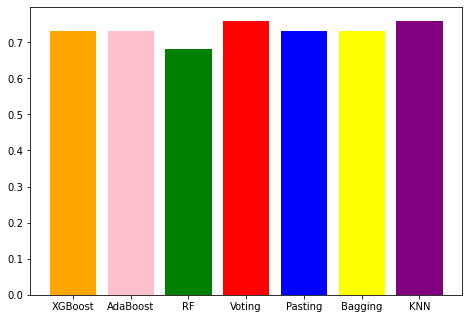

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN']
accuracy = [0.88,0.73,0.68,0.76,0.73,0.73,0.76]
ax.bar(langs,accuracy)
height = [0.73,0.73,0.68,0.76,0.73,0.73,0.76]
bars = ('XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['orange', 'pink', 'green', 'red', 'blue', 'yellow', 'purple'])

plt.show()

# Final Test
### We got the best results on XGBoost model with 88% accuracy after PCA. Now we can run the final test we saved for last on the best model which gave us the best results. 

In [55]:
xgb_clf = xgboost.XGBClassifier(n_estimators = 2000,learning_rate = 0.04,use_label_encoder = False, eval_metric = "merror")
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced_final)
print(accuracy_score(y1,pred))

0.8922


## our final results is 89% accurcy !

# conclusion
### PCA is an algorithm that can make us to get better results while we actually drop "unnecessery" dimentiond of the data we're working on. the meaning is we can still explain over 90% of the data well , but faster and more efficient by dimentionality reduction. As we can see, we tried many models befor and after PCA and each one of them reacted diffrently. Somtimes loosing 2% of the accuracy will be better for us if we made our model more efficient, so we'll need to calculate our "risks" and decide what is the best for us.

# The END !